In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import shap

In [2]:
#reading data into pandas DF
df = pd.read_csv(Path('../Clean_datasets/Agg_Final_clean_table.csv'))
df

,County_of_Residence,Age,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,...,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,Description,urban,rural,suburban
0,Alameda,Less than 1 year,1,0,0,0,411,0,0,85,...,0,194,216,410,6,0,urban,1,0,0
1,Alameda,1 - 4 years,2,0,0,0,61,0,0,36,...,0,36,36,41,0,0,urban,1,0,0
2,Alameda,5 - 9 years,3,0,0,0,60,0,0,30,...,0,36,36,36,6,0,urban,1,0,0
3,Alameda,10 - 14 years,4,0,0,0,66,0,0,24,...,0,36,36,50,0,0,urban,1,0,0
4,Alameda,15 - 19 years,5,0,0,73,138,60,0,36,...,0,58,169,233,6,12,urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yuba,80 - 84 years,18,60,50,204,98,100,20,36,...,191,211,235,289,0,157,rural,0,1,0
1272,Yuba,85 - 89 years,19,60,50,155,103,73,20,36,...,209,192,179,249,0,122,rural,0,1,0
1273,Yuba,90 - 94 years,20,60,50,109,89,67,20,36,...,192,173,109,201,0,79,rural,0,1,0
1274,Yuba,95 - 99 years,21,50,10,63,60,50,0,30,...,81,66,36,73,0,36,rural,0,1,0


In [3]:
#Keeping a reference DF
ref_df = df[['Age','age_cat']].copy()
ref_df.drop_duplicates(inplace = True)
ref_df

,Age,age_cat
0,Less than 1 year,1
1,1 - 4 years,2
2,5 - 9 years,3
3,10 - 14 years,4
4,15 - 19 years,5
5,20 - 24 years,6
6,25 - 29 years,7
7,30 - 34 years,8
8,35 - 39 years,9
9,40 - 44 years,10


In [4]:
#dropping the non numerical columns after creating coded columns and the highly correlated columns
df.drop(columns=['Description','County_of_Residence','Age','edu_unknown','other_unknown','immigration_unknown','marital_unknown','veteran_unknown'], inplace= True)
df

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,asian,black_african_american,hispanic,multi_race,...,married,never_married,widowed,female,male,veteran_no,veteran_yes,urban,rural,suburban
0,1,0,0,0,411,0,85,88,117,36,...,0,411,0,194,216,410,0,1,0,0
1,2,0,0,0,61,0,36,24,36,12,...,0,41,0,36,36,41,0,1,0,0
2,3,0,0,0,60,0,30,24,36,12,...,0,36,0,36,36,36,0,1,0,0
3,4,0,0,0,66,0,24,24,36,6,...,0,50,0,36,36,50,0,1,0,0
4,5,0,0,73,138,60,36,61,68,36,...,6,236,0,58,169,233,12,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,18,60,50,204,98,100,36,36,36,12,...,173,30,191,211,235,289,157,0,1,0
1272,19,60,50,155,103,73,36,30,36,18,...,117,30,209,192,179,249,122,0,1,0
1273,20,60,50,109,89,67,36,30,36,12,...,58,24,192,173,109,201,79,0,1,0
1274,21,50,10,63,60,50,30,18,24,0,...,30,0,81,66,36,73,36,0,1,0


In [5]:
#splitting the features from the target
y = df.age_cat.values
X = df.drop('age_cat',1).values
display(X)
display(y)

array([[  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   1,   0,   0],
       ...,
       [ 60,  50, 109, ...,   0,   1,   0],
       [ 50,  10,  63, ...,   0,   1,   0],
       [ 40,  30,  40, ...,   0,   1,   0]])

array([ 1,  2,  3, ..., 20, 21, 22])

In [6]:
#keeping a list of feature labels
cl = list(df.columns.values)
cl.pop(0)
cl

['bachelors_degree',
 'graduate_degree',
 'high_school_or_GED',
 'less_than_high_school',
 'some_college_credit',
 'asian',
 'black_african_american',
 'hispanic',
 'multi_race',
 'native_american',
 'pi_native_hawaiian',
 'white',
 'foreign_born',
 'united_states',
 'divorced',
 'married',
 'never_married',
 'widowed',
 'female',
 'male',
 'veteran_no',
 'veteran_yes',
 'urban',
 'rural',
 'suburban']

In [7]:
#Splitting the data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [8]:
#Function to Fit and evaluate the models    
def fit_and_evaluate(model):
    #fitting the unscaled data to the model 
    model.fit(X_train, y_train)
    #creating prediction table
    predictions =model.predict(X_test)
    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    #calculating  and displaying ROC Score (ranges from ) 0 to 1 -- 1 being max
    y_pred_proba = model.predict_proba(X_test)
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba, multi_class = 'ovr')) 
    # Displaying results
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    
#creating a Confusion matrix function 
def plot_confusion_matrix(model):
    #fitting the unscaled data to the model 
    model.fit(X_train, y_train)
    #creating prediction table
    predictions =model.predict(X_test)
    # Calculating the accuracy score
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(cm)
    fig, ax = plt.subplots(figsize=(12,12))         
    sns.heatmap(cm_df, annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1, center = 0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(f"Confusion Matrix for : {model}")

#function to create a feature importance series and plot it for each model 
def model_feature_importance(model):
    print(f"feature importance Table for : {model}")
    importances = pd.Series(model.feature_importances_, cl)
    display(importances)
    print(f"feature importance plotfor : {model}")
    importances.sort_values().plot.barh(color='b',figsize=(9,9));   
    
#creating a calling function   
def evaluate_and_plot(model):
    fit_and_evaluate(model);
    model_feature_importance(model);
    plot_confusion_matrix(model);

## Support Vector Classifier

In [9]:
#creating a SVC model
lsvc = LinearSVC(dual = False)
#fitting the data to the model 
lsvc.fit(X_train, y_train)
#creating prediction table
lsvc_predictions =lsvc.predict(X_test)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, lsvc_predictions)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, lsvc_predictions))

Accuracy Score : 0.49609375
Classification Report
              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.25      0.18      0.21        11
           3       0.38      0.42      0.40        12
           4       0.47      0.67      0.55        12
           5       1.00      0.92      0.96        12
           6       0.62      0.73      0.67        11
           7       0.31      0.33      0.32        12
           8       0.30      0.25      0.27        12
           9       0.14      0.09      0.11        11
          10       0.42      0.42      0.42        12
          11       0.08      0.08      0.08        12
          12       0.27      0.27      0.27        11
          13       0.20      0.08      0.12        12
          14       0.47      0.64      0.54        11
          15       0.46      0.50      0.48        12
          16       0.46      0.55      0.50        11
          17       0.60      0.

Confusion Matrix for : LinearSVC(dual=False)


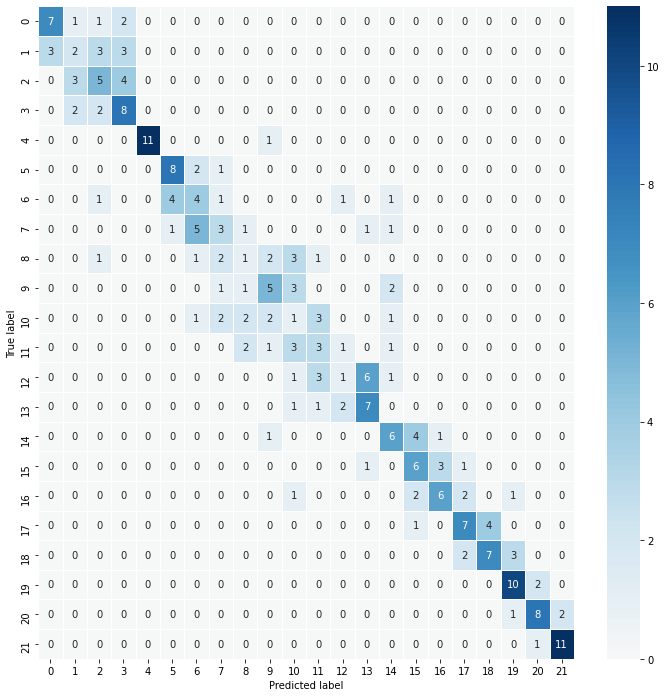

In [10]:
plot_confusion_matrix(lsvc)

## Decision Tree

In [11]:
#Creating a decision trees Model
Tree = tree.DecisionTreeClassifier()

ROC AUC Score: 0.6896135865943723
Accuracy Score : 0.40234375
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.55      0.57        11
           2       0.50      0.55      0.52        11
           3       0.31      0.33      0.32        12
           4       0.43      0.50      0.46        12
           5       0.90      0.75      0.82        12
           6       0.60      0.55      0.57        11
           7       0.33      0.17      0.22        12
           8       0.25      0.25      0.25        12
           9       0.19      0.27      0.22        11
          10       0.21      0.25      0.23        12
          11       0.21      0.25      0.23        12
          12       0.33      0.36      0.35        11
          13       0.29      0.17      0.21        12
          14       0.15      0.18      0.17        11
          15       0.42      0.42      0.42        12
          16       0.50      0.45      0.48        

bachelors_degree          0.024825
graduate_degree           0.030170
high_school_or_GED        0.073439
less_than_high_school     0.045335
some_college_credit       0.025642
asian                     0.024128
black_african_american    0.013539
hispanic                  0.025208
multi_race                0.038105
native_american           0.019114
pi_native_hawaiian        0.014862
white                     0.048616
foreign_born              0.040127
united_states             0.016869
divorced                  0.072759
married                   0.095759
never_married             0.084047
widowed                   0.140693
female                    0.031202
male                      0.038209
veteran_no                0.027781
veteran_yes               0.036140
urban                     0.009046
rural                     0.017570
suburban                  0.006814
dtype: float64

feature importance plotfor : DecisionTreeClassifier()
Confusion Matrix for : DecisionTreeClassifier()


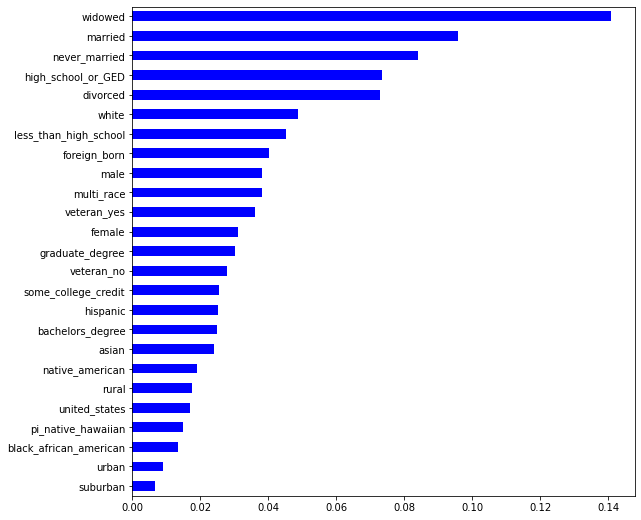

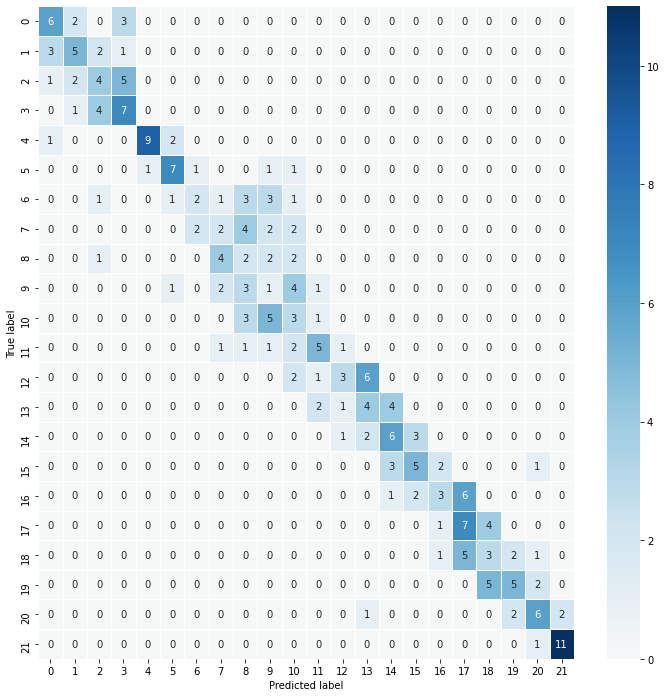

In [12]:
evaluate_and_plot(Tree)

## Random Forest

In [13]:
# Create a random forest classifier.
rf = RandomForestClassifier(n_estimators=1200, random_state=42) 

ROC AUC Score: 0.929944749204383
Accuracy Score : 0.375
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.55      0.57        11
           2       0.43      0.27      0.33        11
           3       0.27      0.33      0.30        12
           4       0.44      0.58      0.50        12
           5       0.83      0.83      0.83        12
           6       0.73      0.73      0.73        11
           7       0.62      0.42      0.50        12
           8       0.08      0.08      0.08        12
           9       0.08      0.09      0.09        11
          10       0.21      0.25      0.23        12
          11       0.14      0.17      0.15        12
          12       0.67      0.36      0.47        11
          13       0.25      0.17      0.20        12
          14       0.29      0.36      0.32        11
          15       0.40      0.50      0.44        12
          16       0.40      0.36      0.38        11
   

bachelors_degree          0.030180
graduate_degree           0.028652
high_school_or_GED        0.052865
less_than_high_school     0.043408
some_college_credit       0.043727
asian                     0.027128
black_african_american    0.028225
hispanic                  0.043630
multi_race                0.031088
native_american           0.028585
pi_native_hawaiian        0.014274
white                     0.048877
foreign_born              0.037558
united_states             0.036427
divorced                  0.069139
married                   0.065507
never_married             0.069418
widowed                   0.088387
female                    0.045859
male                      0.045816
veteran_no                0.036321
veteran_yes               0.055122
urban                     0.007423
rural                     0.013432
suburban                  0.008952
dtype: float64

feature importance plotfor : RandomForestClassifier(n_estimators=1200, random_state=42)
Confusion Matrix for : RandomForestClassifier(n_estimators=1200, random_state=42)


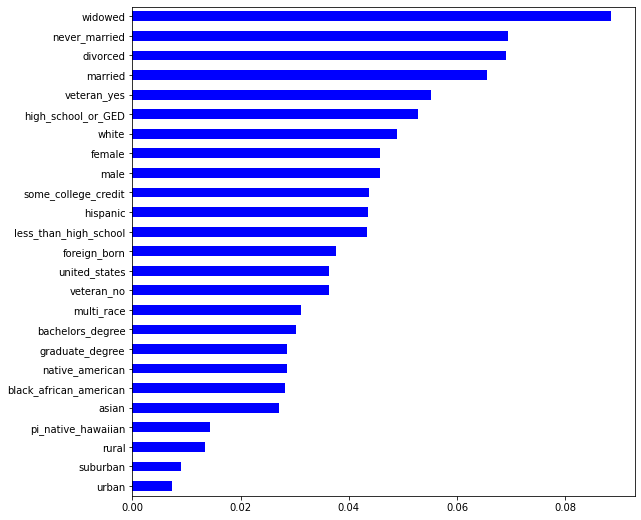

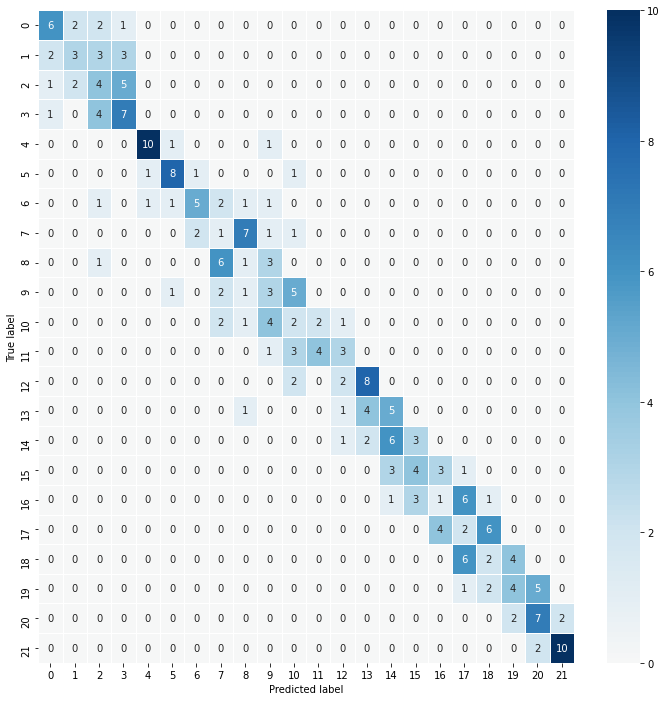

In [14]:
evaluate_and_plot(rf)

## AdaBoost 

In [15]:
#creating Adaboost classifier
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=9),n_estimators=700)

ROC AUC Score: 0.931026516418788
Accuracy Score : 0.3984375
Classification Report
              precision    recall  f1-score   support

           1       0.55      0.55      0.55        11
           2       0.33      0.27      0.30        11
           3       0.24      0.33      0.28        12
           4       0.46      0.50      0.48        12
           5       0.83      0.83      0.83        12
           6       0.64      0.64      0.64        11
           7       0.57      0.33      0.42        12
           8       0.33      0.25      0.29        12
           9       0.18      0.27      0.21        11
          10       0.18      0.17      0.17        12
          11       0.17      0.17      0.17        12
          12       0.40      0.36      0.38        11
          13       0.30      0.25      0.27        12
          14       0.47      0.64      0.54        11
          15       0.50      0.50      0.50        12
          16       0.36      0.45      0.40        11

invalid value encountered in true_divide


bachelors_degree          0.024624
graduate_degree                NaN
high_school_or_GED        0.035764
less_than_high_school          NaN
some_college_credit            NaN
asian                          NaN
black_african_american         NaN
hispanic                       NaN
multi_race                0.031766
native_american           0.040404
pi_native_hawaiian        0.015795
white                          NaN
foreign_born              0.031224
united_states                  NaN
divorced                  0.068498
married                   0.069119
never_married                  NaN
widowed                   0.134602
female                         NaN
male                      0.027032
veteran_no                     NaN
veteran_yes                    NaN
urban                     0.004262
rural                     0.004499
suburban                  0.005408
dtype: float64

feature importance plotfor : AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=700)
Confusion Matrix for : AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=700)


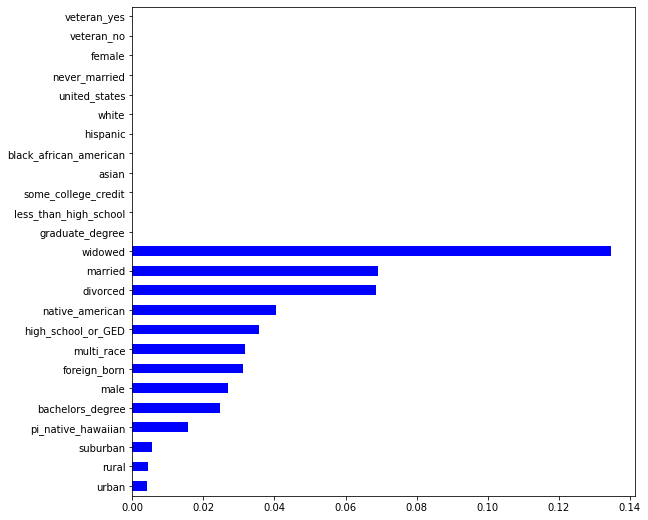

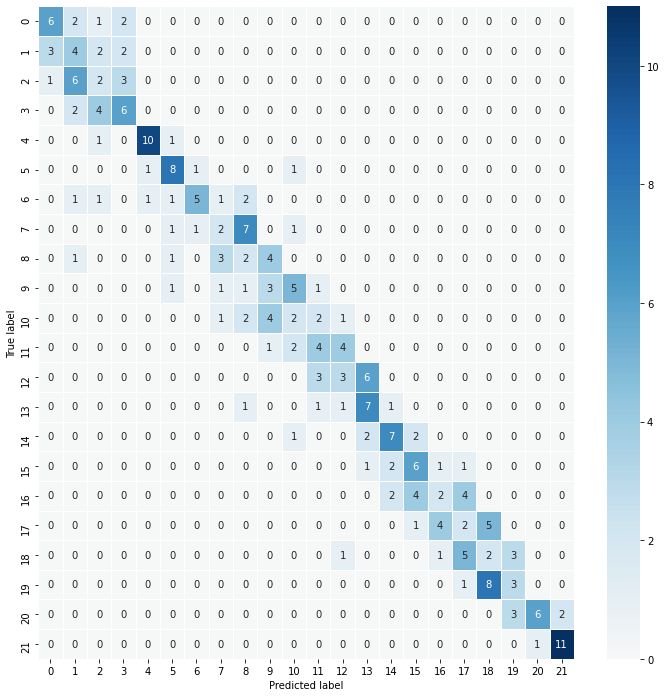

In [16]:
evaluate_and_plot(ada)